In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# load data from CSV file
clean_file_path = './data/diabetes_prediction_dataset_clean.csv'

data = pd.read_csv(clean_file_path)

In [2]:
columns_to_normalize = ['blood_glucose_level', 'bmi']

# MinMaxScaler Object
scaler = MinMaxScaler()

# Normalization
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

normalized_file_path = './data/diabetes_prediction_dataset_clean_normalized.csv'
data.to_csv(normalized_file_path, index=False)

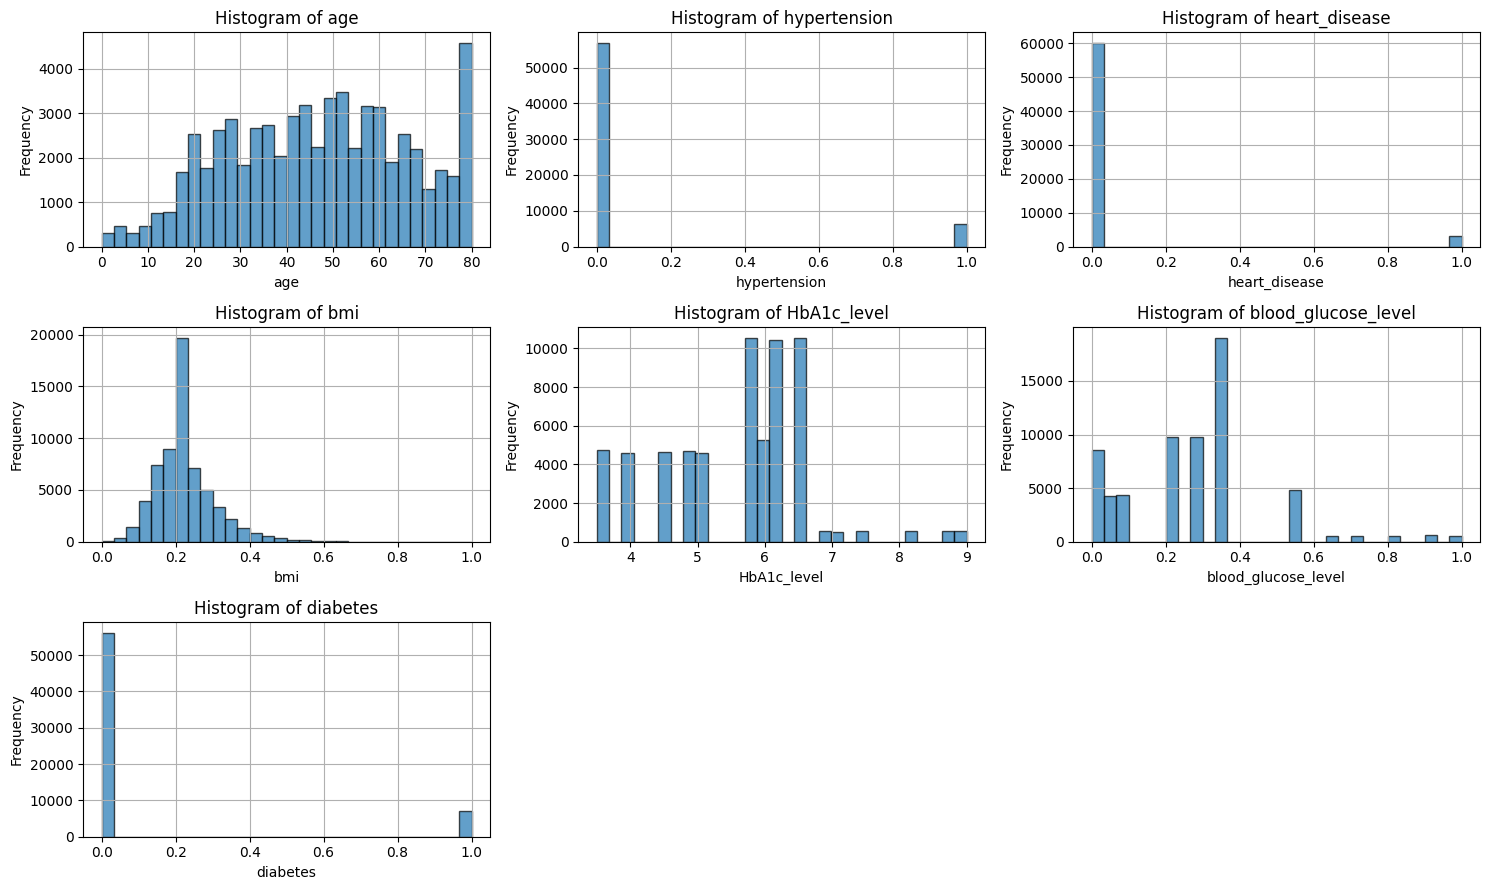

In [3]:
# list of numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# number of columns and rows in the grid
n_cols = 3                                                  # number of columns in the grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols      # number of rows in the grid

# Create a grid of histograms
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))

# Plot histograms
for i, column in enumerate(numeric_columns):
    ax = axs[i // n_cols, i % n_cols]
    ax.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()